## Imports

In [1]:
import os
import math

import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
sns.set()

In [2]:
from plottingtools import plot_objective_values, plot_membership_histogram
from mixtureofconcave import concave_function, submodular_oracle
from greedyvariations import *

---

## आधी क्वोटोबा मग विठोबा : Intersecting Memberships

e.g. Female, Black, Age group

In [3]:
# Setup
n = 100
m = 80
k = 20
p = 3
p_dist = [0.4, 0.3, 0.6]  # across groups
disadvantage_factor = 0.6  # weights shrunk by
disadvantage_features = [6, 12, 24]  # number of features to shrink weights on

np.random.seed(0)
X = np.random.random((n, m))
weights = np.random.random(m); weights = weights/np.max(weights)

In [4]:
# Intersecting Memberships
np.random.seed(1)
intersecting_memberships = np.empty((n, p))
for pp in range(p):
    intersecting_memberships[:, pp] = np.random.choice([0, 1], size=n, p=[1-p_dist[pp], p_dist[pp]])
intersecting_quotas = np.array([4, 4, 4])
intersecting_capacities = k - intersecting_quotas
""" Note: We constrain the capacity on the majority group.
"""

# Inversely correlate with utility
for pp in range(p):
    df = np.random.choice(np.arange(m), size=disadvantage_features[pp], replace=False)
    dm = np.where(intersecting_memberships[:, pp] == 1)[0]
    for member in dm:
        for feature in df:
            X[member, feature] *= disadvantage_factor

In [5]:
# Color Scheme
# 'dimgrey' '#696969'
# 'darkkhaki' '#BDB76B'  # ground set
# 'indianred' '#CD5C5C'  # random
# 'darkcyan' '#008B8B'  # unconstrained
# 'gold' '#FFD700'  # disjoint membership capacity
# 'skyblue' '#87CEEB'  # intersecting membership capacity
# 'orange' '#FFA500'  # disjoint membership quota
# 'lightpink' '#FFB6C1'  # intersecting membership quota

In [6]:
## Ground set eval
oracle = submodular_oracle(concave_function, weights, X)
ground = oracle.compute_set_value(np.arange(n))

<p style="background-color:#CD5C5C">
<span style="color:white">Random</span>.
</p>

In [7]:
## Random choice
S_random, objectives_random = random_vanilla(submodular_oracle(concave_function, weights, X), k)

# [print(oo) for oo in objectives_random]
# print("group memberships = ", np.sum(intersecting_memberships[S_random], axis=0))
# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
# plot_objective_values(objectives_random, ground, "indianred", "dimgrey")
# plt.subplot(1,2,2)
# plot_membership_histogram(
#     intersecting_memberships, None, S_random,
#     "indianred", "darkkhaki", setlabel="random",
#     value=objectives_random[-1]
# )

<p style="background-color:#008B8B">
<span style="color:white">Unconstrained Greedy</span>.
</p>

In [8]:
## Submod greedy
S_unc, objectives_unc = greedy_vanilla(submodular_oracle(concave_function, weights, X), k)

# [print(oo) for oo in objectives_unc]
# print("group memberships = ", np.sum(intersecting_memberships[S_unc], axis=0))
# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
# plot_objective_values(objectives_unc, ground, "darkcyan", "dimgrey")
# plt.subplot(1,2,2)
# plot_membership_histogram(
#     intersecting_memberships, None, S_unc,
#     "darkcyan", "darkkhaki", setlabel="unconstrained",
#     value=objectives_unc[-1]
# )

<p style="background-color:#FFD700">
<span style="color:white">Capacity Constrained Greedy</span>.
</p>

In [9]:
## Capacity greedy (Disjoint)
""" Note: We constrain the capacity on the majority group.
"""
S_capacity, objectives_capacity = greedy_capacity(
    submodular_oracle(concave_function, weights, X),
    (1 - intersecting_memberships), intersecting_capacities, k
)

# [print(oo) for oo in objectives]
# print("group memberships = ", np.sum(intersecting_memberships[S_capacity], axis=0))
# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
# plot_objective_values(objectives_capacity, ground, "darkorange", "dimgrey")
# plt.subplot(1,2,2)
# plot_membership_histogram(
#     intersecting_memberships, intersecting_capacities, S_capacity,
#     "gold", "darkkhaki", setlabel="quota greedy",
#     budgetlabel="capacities", value=objectives_capacity[-1]
# )

<p style="background-color:#FFA500">
<span style="color:white">Quota Constrained Greedy</span>.
</p>

In [10]:
## Quota greedy (Disjoint)
S_quota, objectives_quota = greedy_prioritized_quota(
    submodular_oracle(concave_function, weights, X),
    intersecting_memberships, intersecting_quotas, k
)

# [print(oo) for oo in objectives]
# print("group memberships = ", np.sum(intersecting_memberships[S_quota], axis=0))
# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
# plot_objective_values(objectives_quota, ground, "darkorange", "dimgrey")
# plt.subplot(1,2,2)
# plot_membership_histogram(
#     intersecting_memberships, intersecting_quotas, S_quota,
#     "darkorange", "darkkhaki", setlabel="quota greedy",
#     budgetlabel="quotas", value=objectives_quota[-1]
# )

## Plot

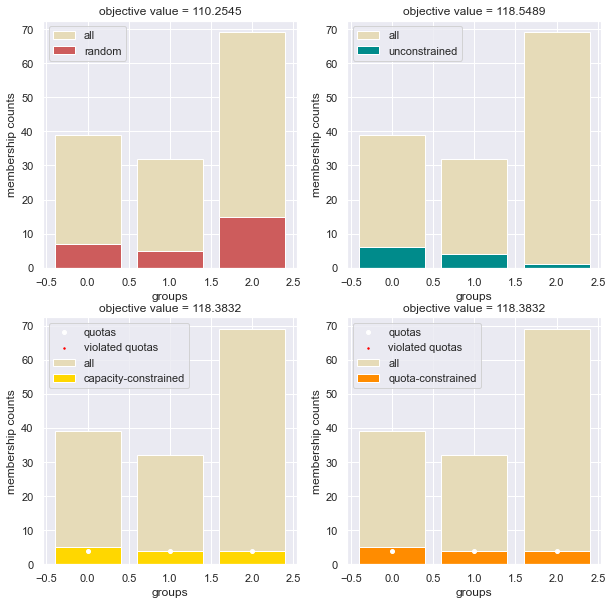

In [11]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plot_membership_histogram(
    intersecting_memberships, None, S_random,
    "indianred", "#e6dbb8", setlabel="random",
    value=objectives_random[-1]
)
plt.subplot(2,2,2)
plot_membership_histogram(
    intersecting_memberships, None, S_unc,
    "darkcyan", "#e6dbb8", setlabel="unconstrained",
    value=objectives_unc[-1]
)
plt.subplot(2,2,3)
# plot_membership_histogram(
#     (1 - intersecting_memberships), intersecting_capacities, S_capacity,
#     "gold", "#e6dbb8", setlabel="capacity-constrained",
#     budgetlabel="capacities", value=objectives_capacity[-1]
# )
plot_membership_histogram(
    intersecting_memberships, intersecting_quotas, S_capacity,
    "gold", "#e6dbb8", setlabel="capacity-constrained",
    budgetlabel="quotas", value=objectives_quota[-1]
)
plt.subplot(2,2,4)
plot_membership_histogram(
    intersecting_memberships, intersecting_quotas, S_quota,
    "darkorange", "#e6dbb8", setlabel="quota-constrained",
    budgetlabel="quotas", value=objectives_quota[-1]
)
plt.savefig("intersecting_memberships_1.png", dpi=500)

In [12]:
print("unconstrained group memberships = ", np.sum(intersecting_memberships[S_unc], axis=0))

unconstrained group memberships =  [6. 4. 1.]


In [13]:
print("capactiy-constrained group memberships = ", np.sum(intersecting_memberships[S_capacity], axis=0))

capactiy-constrained group memberships =  [5. 4. 4.]


In [14]:
print("quota-constrained group memberships = ", np.sum(intersecting_memberships[S_quota], axis=0))

quota-constrained group memberships =  [5. 4. 4.]
